## Correlation Matrix

Looking at the correlation matrix of the best features (according to our feature selection algorithm), we can see that the following columns have a high correlation:
- RAB_mean and RAB_min (we're going to remove the RAB_min column)
- RAB_mean and RAB_max (we're going to remove the RAB_max column)
- ratio_RAB and RAB (we're going to remove the RAB)
- withdrawal_ration and mean_trans_profit (we're going to remove the withdrawal_ration)
- IC_mean and balance_mean (we're going to remove the IC_mean)
- RAB_sum and RAB (we're going to remove the RAB, as we said previously)
- CAB_min and ratio_CC (we're going to remove the CAB_min)
- CAB_min and CAB_max (we're going to remove CAB_min, as we said previously)
- CAB_max and CAB_sum (we're going to remove CAB_max)
- CAB_mean and CAB_sum (we're going to remove CAB_sum)

In [2]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("./preprocessed/mergedTrainData.csv")

best_features = [
    'reached_negative_balance', 'RAB_mean', 'RAB_min', 'ratio_RAB', 'RAB_max', 'credit_ratio', 'withdrawal_ratio',
    'IC_mean', 'balance_min', 'RAB_sum', 'mean_trans_profit', 'RAB', 'balance_mean', 'ratio_CC', 'CC_std', 'IC_min', 'CC_max',
    'ratio_IC', 'withdrawal_max', 'WC_max', 'last_balance', 'CAB_min', 'CAB_mean', 'CAB_max', 'CAB_sum'
]

corr = df[best_features].corr()

#corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,reached_negative_balance,RAB_mean,RAB_min,ratio_RAB,RAB_max,credit_ratio,withdrawal_ratio,IC_mean,balance_min,RAB_sum,mean_trans_profit,RAB,balance_mean,ratio_CC,CC_std,IC_min,CC_max,ratio_IC,withdrawal_max,WC_max,last_balance,CAB_min,CAB_mean,CAB_max,CAB_sum
reached_negative_balance,1.000000,-0.132131,-0.120011,0.097961,-0.132420,0.044440,-0.044440,0.095479,0.424647,-0.070520,0.021640,0.069185,0.112166,-0.045350,-0.172158,0.161555,-0.216216,0.005285,-0.058664,-0.059190,0.156275,0.124314,0.124434,0.123675,0.108344
RAB_mean,-0.132131,1.000000,0.949854,-0.330096,0.957275,0.212453,-0.212453,-0.062326,-0.070189,0.590875,-0.179102,-0.180000,-0.061253,0.212095,0.161711,-0.010934,0.131925,0.186384,-0.122200,-0.121936,0.046902,-0.195057,-0.198094,-0.202632,-0.141159
RAB_min,-0.120011,0.949854,1.000000,-0.523764,0.827146,0.311844,-0.311844,-0.047800,-0.083995,0.692775,-0.266375,-0.356184,-0.037391,0.268160,0.182782,-0.030697,0.146714,0.256046,-0.155240,-0.151820,0.088915,-0.214428,-0.217213,-0.222848,-0.174902
ratio_RAB,0.097961,-0.330096,-0.523764,1.000000,-0.143739,-0.576966,0.576966,-0.107971,0.093553,-0.675380,0.380562,0.888986,-0.171082,-0.251481,-0.167682,-0.015782,-0.106376,-0.443456,0.230397,0.229291,-0.217035,0.002192,0.002255,0.009042,0.051487
RAB_max,-0.132420,0.957275,0.827146,-0.143739,1.000000,0.118444,-0.118444,-0.070313,-0.046570,0.452777,-0.096877,-0.021983,-0.071462,0.144310,0.126729,0.004080,0.104815,0.120850,-0.082225,-0.083644,0.011829,-0.156571,-0.159657,-0.162739,-0.099982
credit_ratio,0.044440,0.212453,0.311844,-0.576966,0.118444,1.000000,-1.000000,-0.330572,-0.033749,0.489410,-0.755921,-0.562190,-0.206833,0.584166,0.125241,-0.125081,0.026563,0.674528,-0.576182,-0.578931,0.090312,-0.205092,-0.206286,-0.220190,-0.317756
withdrawal_ratio,-0.044440,-0.212453,-0.311844,0.576966,-0.118444,-1.000000,1.000000,0.330572,0.033749,-0.489410,0.755921,0.562190,0.206833,-0.584166,-0.125241,0.125081,-0.026563,-0.674528,0.576182,0.578931,-0.090312,0.205092,0.206286,0.220190,0.317756
IC_mean,0.095479,-0.062326,-0.047800,-0.107971,-0.070313,-0.330572,0.330572,1.000000,0.050986,-0.051262,0.463817,-0.051214,0.901056,-0.272690,0.190048,0.609151,0.210187,-0.244762,0.154984,0.158226,0.492350,0.324530,0.323364,0.329240,0.322381
balance_min,0.424647,-0.070189,-0.083995,0.093553,-0.046570,-0.033749,0.033749,0.050986,1.000000,-0.179019,0.084183,0.135513,0.039420,-0.079889,-0.131459,0.084779,-0.157852,-0.048045,-0.006972,-0.007383,0.064354,0.132671,0.133719,0.132528,0.195435
RAB_sum,-0.070520,0.590875,0.692775,-0.675380,0.452777,0.489410,-0.489410,-0.051262,-0.179019,1.000000,-0.406941,-0.742667,-0.006082,0.256490,0.096299,-0.052994,0.041614,0.359500,-0.198017,-0.199378,0.119693,-0.126869,-0.127842,-0.133380,-0.267626


In [3]:
features_to_remove = ['RAB_min', 'RAB_max', 'RAB', 'withdrawal_ratio', 'IC_mean', 'CAB_min', 'CAB_max', 'CAB_sum']
selected_features = list(filter(lambda x: x not in features_to_remove, best_features))
print(selected_features)

['reached_negative_balance', 'RAB_mean', 'ratio_RAB', 'credit_ratio', 'balance_min', 'RAB_sum', 'mean_trans_profit', 'balance_mean', 'ratio_CC', 'CC_std', 'IC_min', 'CC_max', 'ratio_IC', 'withdrawal_max', 'WC_max', 'last_balance', 'CAB_mean']


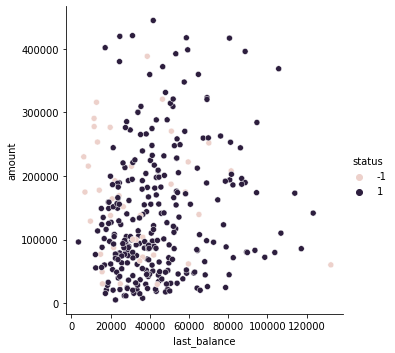

In [4]:
plot = sns.relplot(y="amount", x="last_balance", hue="status", data=df)
plot.fig.suptitle("Relation between last_balance and amount", verticalalignment="bottom", fontsize="14")

Looking at this plot, we can observe that most of the unsuccessful loans are usually located on the left part of the chart, which means that people with low balances on their accounts are prone to fail loan payments.

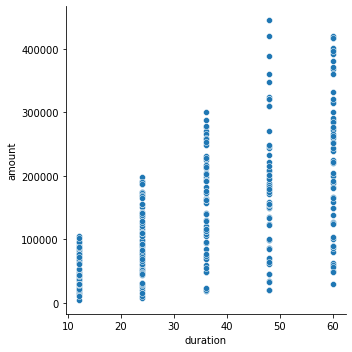

In [5]:
plot = sns.relplot(y="amount", x="duration", data=df)
plot.fig.suptitle("Relation between duration and amount", verticalalignment="bottom", fontsize="14")

As we can see in this plot, higher duration loans result typically in higher amounts.

In [ ]:
sns.pairplot(df[selected_features + ["status"]], hue="status", corner=True)

## Loan Relation Plots
Looking at the following plots, it is visible the correlation between the amount, payments and duration of the loan.

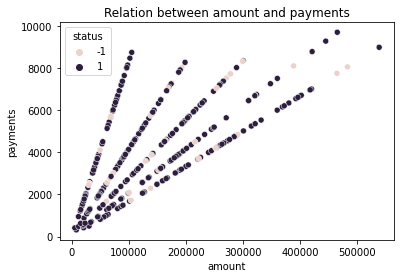

In [7]:
def scatterplot_graph(df, col1, col2, title, col_hue=None):
  if col_hue != None:
    sns.scatterplot(data=df, x=df[col1], y=df[col2], hue=col_hue).set_title(title)
  else:
    sns.scatterplot(data=df, x=df[col1], y=df[col2]).set_title(title)

loan_train_data = pd.read_csv("./files/loan_train.csv", sep=";")
scatterplot_graph(df=loan_train_data, col1="amount", col2="payments", title="Relation between amount and payments", col_hue="status")

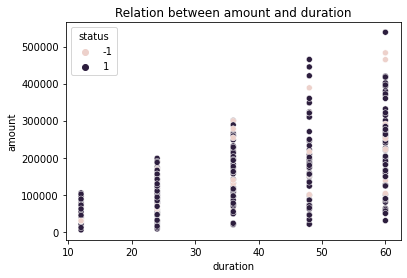

In [8]:
scatterplot_graph(df=loan_train_data, col1="duration", col2="amount", title="Relation between amount and duration", col_hue="status")

## Inter-Quartile Balance per Account and Last account Balance Relation

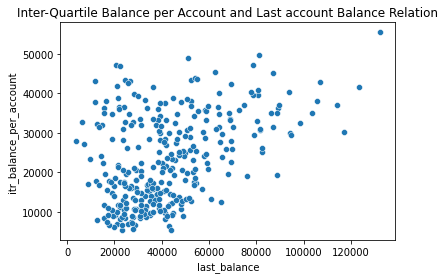

In [9]:
merged_data_train = pd.read_csv("./preprocessed/mergedTrainData.csv")
scatterplot_graph(df=merged_data_train, col1="last_balance", col2="itr_balance_per_account", title="Inter-Quartile Balance per Account and Last account Balance Relation")

## Age Group Distribution

In [10]:
from sklearn.preprocessing import KBinsDiscretizer

def histplot_graph(df, title, no_bins='auto', col= None):
  if col is None:
    sns.histplot(data=df, bins=no_bins).set_title(title)
  else:
    sns.histplot(data=df, x=col, bins=no_bins).set_title(title)

# Statistical Methods

In [ ]:
loan_train_data = pd.read_csv("./preprocessed/loan_train_data.csv", index_col=0)

loan_years = [24, 25, 26, 27, 28]
print("----- Loan Train Data -----")
for year in loan_years:
  loan_data_year = loan_train_data[['amount']].loc[loan_train_data['years_since_loan'] == year]
  print("Statistics for year: " + str(2021 - year))
  print(loan_data_year.describe()['amount'][['mean', 'std', 'min', 'max']])
  print("\n")

In [ ]:
loan_test_data = pd.read_csv("./preprocessed/loan_test_data.csv", index_col=0)
loan_years = [22, 23, 24]
print("----- Loan Test Data -----")
for year in loan_years:
  loan_data_year = loan_test_data[['years_since_loan', 'amount']].loc[loan_test_data['years_since_loan'] == year]
  print("Statistics for year: " + str(2021 - year))
  print(loan_data_year.describe()['amount'][['mean', 'std', 'min', 'max']])
  print("\n")

### Loan Statistics
Through the gathering of statistics about loans, namely the mean, standard deviation, minimum and maximum amounts of loans for every year in the train and test datasets we conclude there was a huge variation in the standard deviation of amounts between 1993, 1994 and 1995 in the train dataset. This means the loan amounts were getting more spread out through the years. In 1996 and 1997 the spreading diminuished a bit but were still high comparing to 1993 and 1994. It's also important to note that through the years the average loan amount was growing when viewing train a test datasets independently. This is a metric that clearly demonstrates people were having greater debts.



![](./images/loanStatistics.png)

In [112]:
def trans_stats(df):
  credit_df = df.loc[df["type"] == "credit"]['amount']
  withdrawal_df = df.loc[df["type"] == "withdrawal"]['amount']
  print("\n----- Credit Data -----")
  print(credit_df.describe()[['count', 'mean', 'std', 'min', 'max']])
  print("\n----- Withdrawal Data -----")
  print(withdrawal_df.describe()[['count', 'mean', 'std', 'min', 'max']])

### Transaction Statistics

In [115]:
trans_train_data = pd.read_csv("./files/trans_train.csv", sep=";")
trans_stats(trans_train_data)


----- Credit Data -----
count    159468.000000
mean       7434.713441
std       11270.880027
min           0.100000
max       74812.000000
Name: amount, dtype: float64

----- Withdrawal Data -----
count    232093.000000
mean       4318.954543
std        7150.189204
min           0.000000
max       86400.000000
Name: amount, dtype: float64


In [116]:
trans_test_data = pd.read_csv("./files/trans_test.csv", sep=";")
trans_stats(trans_test_data)


----- Credit Data -----
count    11882.000000
mean     12042.352466
std      15415.333366
min          0.400000
max      74642.000000
Name: amount, dtype: float64

----- Withdrawal Data -----
count    17462.000000
mean      6721.960531
std       9619.410098
min          0.200000
max      78900.000000
Name: amount, dtype: float64


For both the train and test data, the number of withdrawals is lower than the number of credits. But that doesn't mean the amount credited/withdrawn followed the same proportion. If that happened, people would bankrupt. And we can see that doesn't happen, comparing the mean credited value against the mean withdrawn value. The first is higher than the second, of course. It is expected that the credits transactions compensate the withdrawal transactions otherwise people wouldn't have any more money to move. Also, the standard deviation of credits is higher for credits than for withdrawals meaning that credit values are more spread out concerning the mean. 